# Introduction
In this project, we tackle the task of classification using a Multilayer Perceptron (MLP) model. Our objective is to classify images into different categories based on their content. The dataset we use for this task is the Street View House Numbers (SVHN) dataset, which contains a large collection of images of digits collected from Google Street View images. 

The goal of our MLP project is to develop a model capable of accurately recognizing and classifying the digits present in the images. We aim to leverage the capabilities of neural networks to learn and extract meaningful features from the input images, allowing the model to make accurate predictions about the digits depicted in the images. 

Through this project, we demonstrate the effectiveness of MLPs in image classification tasks and explore the potential applications of deep learning models in real-world scenarios.

## Imports

In [46]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize, RandomRotation, RandomHorizontalFlip
import torchvision.datasets as datasets
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
import numpy as np
import math
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

## Dataset Overview
**Number of Instances:** The SVHN (Street View House Numbers) dataset contains a large number of images collected from house numbers in Google Street View images. The training set consists of 73,257 images, and the test set consists of 26,032 images.<br>
**Features:** Each image in the SVHN dataset is represented by three color channels (RGB) and varying dimensions. The exact number of features depends on the image resolution, which is typically 32x32 pixels for this dataset. Therefore, each image is described by 32x32x3 = 3072 features.<br>
**Labels:** The dataset includes 10 classes, corresponding to the digits 0 through 9. These digits are found in natural scenes, and each image contains a single digit cropped from its original context.


## Custom MLP Model

In [47]:
# MLP Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.l2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.l3(out)
        return out
    
    
# Training the model
def train_model(model, optimizer, data_loader, loss_module, device, num_epochs=5):
    model.train()
    n_total_steps = len(data_loader)
    for epoch in range(num_epochs):
        total1 = 0
        correct1 = 0
        for i, (data_inputs, data_labels) in enumerate(data_loader):
            optimizer.zero_grad()
            data_inputs = data_inputs.view(-1, input_size).to(device)
            data_inputs = data_inputs.reshape(-1, input_size).to(device)
            data_labels = data_labels.to(device)
            
            # Forward pass
            outputs = model(data_inputs)
            loss = criterion(outputs, data_labels)
            
            # Backward and optimize
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total1 += data_labels.size(0)
            correct1 += (predicted == data_labels).sum().item()
        
            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{n_total_steps}], Loss: {loss.item():.4f}')

        # Step the learning rate scheduler
        scheduler.step()
        
        # Print training accuracy after each epoch
        train_accuracy = correct1 / total1
        print(f'Training Accuracy after Epoch [{epoch + 1}/{num_epochs}]: {100 * train_accuracy:.2f}%')
        
# Evaluate the model
def eval_model(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.view(-1, input_size).to(device)
            data_labels = data_labels.to(device)

            outputs = model(data_inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += data_labels.size(0)
            correct += (predicted == data_labels).sum().item()

    accuracy = correct / total
    print(f'Accuracy of the Classifier on the {len(data_loader.dataset)} test images: {100 * accuracy:.2f} %')

## Custom MLP Model

## Use the image dataset and Visualize the Images

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


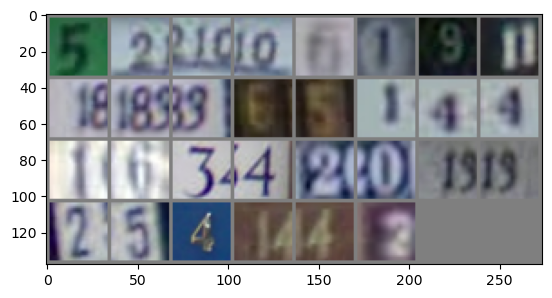

In [48]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 32 * 32 * 3  # SVHN images are 32x32 with 3 channels (RGB)
hidden_size1 = 500
hidden_size2 = 500
num_classes = 10
num_epochs = 5  
batch_size = 64
learning_rate = 0.001

# SVHN dataset with data augmentation
transform_train = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.SVHN(root='./data',
                                          split='train',
                                          transform=transform_train,
                                          download=True)

test_dataset = torchvision.datasets.SVHN(root='./data',
                                         split='test',
                                         transform=transform_test,
                                         download=True)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Visualize some examples
examples = iter(test_loader)
example_data, example_labels = next(examples)

# Unnormalize and plot the images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(example_data[:30]))

## Train and Evaluate the Model

In [49]:
# Initialize the model, Weight initialization function
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight.data)

# Add L1 regularization to linear layers
l1_lambda = 0.001  # Adjust this regularization strength
model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)
model.apply(weights_init)

# Add L1 regularization to linear layers
for name, param in model.named_parameters():
    if 'weight' in name:
        new_name = name.replace('.', '_') + '_l1'  # Replace dot with underscore
        param.requires_grad = True
        model.register_parameter(new_name, nn.Parameter(torch.zeros_like(param), requires_grad=False))
        
# loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# Train the model
train_model(model, optimizer, train_loader, criterion, device, num_epochs=7)
# Evaluate the model
eval_model(model, test_loader, device)


Epoch [1/7], Step [100/1145], Loss: 1.8964
Epoch [1/7], Step [200/1145], Loss: 1.8313
Epoch [1/7], Step [300/1145], Loss: 1.7191
Epoch [1/7], Step [400/1145], Loss: 1.4469
Epoch [1/7], Step [500/1145], Loss: 1.5082
Epoch [1/7], Step [600/1145], Loss: 1.7142
Epoch [1/7], Step [700/1145], Loss: 1.6292
Epoch [1/7], Step [800/1145], Loss: 1.3616
Epoch [1/7], Step [900/1145], Loss: 1.1182
Epoch [1/7], Step [1000/1145], Loss: 1.4807
Epoch [1/7], Step [1100/1145], Loss: 1.1986
Training Accuracy after Epoch [1/7]: 49.49%
Epoch [2/7], Step [100/1145], Loss: 1.3021
Epoch [2/7], Step [200/1145], Loss: 1.4813
Epoch [2/7], Step [300/1145], Loss: 0.9490
Epoch [2/7], Step [400/1145], Loss: 1.1653
Epoch [2/7], Step [500/1145], Loss: 1.3061
Epoch [2/7], Step [600/1145], Loss: 1.1445
Epoch [2/7], Step [700/1145], Loss: 1.0512
Epoch [2/7], Step [800/1145], Loss: 1.0071
Epoch [2/7], Step [900/1145], Loss: 1.2649
Epoch [2/7], Step [1000/1145], Loss: 0.9787
Epoch [2/7], Step [1100/1145], Loss: 0.9477
Traini